# CNN with Fashion MNIST Datset

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(train=True,
                                                  root='.',
                                                  download=True,
                                                  transform=transforms.ToTensor()
                                                  )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
X_train=train_dataset.data
y_train=train_dataset.targets

In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(
    download=True,
    root='.',
    train=False,
    transform = transforms.ToTensor()
)

In [ ]:
X_test=test_dataset.data
y_test=test_dataset.targets

In [ ]:
print(train_dataset.classes)
K=len(train_dataset.classes)
print(K)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
10


In [ ]:
class CNN(nn.Module):
  def __init__(self,K):
    super().__init__()
    self.conv_layers = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2),
        nn.ReLU()
    )
    self.dense_layers = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(128*2*2,512),
        nn.ReLU(),
        nn.Linear(512,K)
    )
  def forward(self,x):
      x=self.conv_layers(x)
      x=x.view(x.size(0),-1)
      x=self.dense_layers(x)
      return x


In [ ]:
model=CNN(K)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
batch_size = 128
Train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           shuffle=True,
                                           batch_size=batch_size)

Test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           shuffle=False,
                                           batch_size=batch_size)

In [ ]:
n_epoch=15
train_losses=torch.zeros(n_epoch)
test_losses=torch.zeros(n_epoch)
for it in range(n_epoch):
  model.train()
  t0=datetime.now()
  train_loss=[]
  for input,target in Train_loader:
    input,target=input.to(device) , target.to(device)
    optimizer.zero_grad()
    outputs=model(input)
    error=loss_fn(outputs,target)
    error.backward()
    optimizer.step()
    train_loss.append(error.item())
  train_losses[it]=np.mean(train_loss)
  test_loss=[]
  for input,target in Test_loader:
    model.eval()
    with torch.inference_mode():
      input,target=input.to(device) , target.to(device)
      outputs=model(input)
      error=loss_fn(outputs,target)
      test_loss.append(error.item())
  test_losses[it]=np.mean(test_loss)
  dt=datetime.now()-t0
  print(f'Epoch {it+1}/{n_epoch} | Train Loss:{train_losses[it]:.2f} | Test Loss:{test_losses[it]:.2f} | Duration:{dt}')

Epoch 1/15 | Train Loss:0.65 | Test Loss:0.51 | Duration:0:00:11.792235
Epoch 2/15 | Train Loss:0.42 | Test Loss:0.42 | Duration:0:00:07.498095
Epoch 3/15 | Train Loss:0.36 | Test Loss:0.37 | Duration:0:00:08.186470
Epoch 4/15 | Train Loss:0.33 | Test Loss:0.35 | Duration:0:00:08.176054
Epoch 5/15 | Train Loss:0.30 | Test Loss:0.36 | Duration:0:00:08.643112
Epoch 6/15 | Train Loss:0.28 | Test Loss:0.33 | Duration:0:00:08.128184
Epoch 7/15 | Train Loss:0.26 | Test Loss:0.31 | Duration:0:00:12.025603
Epoch 8/15 | Train Loss:0.25 | Test Loss:0.32 | Duration:0:00:08.235182
Epoch 9/15 | Train Loss:0.23 | Test Loss:0.30 | Duration:0:00:08.973510
Epoch 10/15 | Train Loss:0.22 | Test Loss:0.30 | Duration:0:00:08.259125
Epoch 11/15 | Train Loss:0.20 | Test Loss:0.30 | Duration:0:00:08.245331
Epoch 12/15 | Train Loss:0.19 | Test Loss:0.29 | Duration:0:00:07.609996
Epoch 13/15 | Train Loss:0.18 | Test Loss:0.29 | Duration:0:00:08.147800
Epoch 14/15 | Train Loss:0.17 | Test Loss:0.31 | Duration:0:

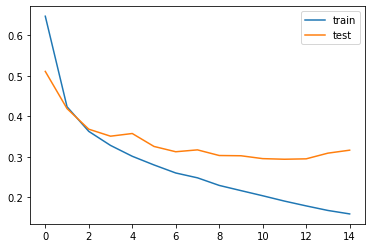

In [ ]:
plt.plot(train_losses,label='train')
plt.plot(test_losses,label='test')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.inference_mode():
  n_correct=0
  n_total=0
  for inputs,targets in Train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    outputs = model(inputs)
    _,predection = torch.max(outputs,1)
    n_correct+=(predection == targets).sum().item()
    n_total+=targets.shape[0]
  train_acc = n_correct/n_total
print(train_acc)

0.9544333333333334


In [ ]:
model.eval()
with torch.inference_mode():
  n_correct=0
  n_total=0
  for inputs,targets in Test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    outputs = model(inputs)
    _,predection = torch.max(outputs,1)
    n_correct+=(predection == targets).sum().item()
    n_total+=targets.shape[0]
  test_acc = n_correct/n_total
print(test_acc)

0.9051


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
y_test = test_dataset.targets.numpy()
p_test= np.array([])
for input , target in Test_loader:
  input,target = input.to(device) , target.to(device)
  output = model(input)
  _,perdictions = output.max(1)
  p_test = np.concatenate((p_test,perdictions.cpu().numpy()))


[[887   1  19  18   2   1  65   0   7   0]
 [  2 977   1  14   2   0   2   0   2   0]
 [ 18   1 821  12  51   0  94   0   3   0]
 [  8   9   6 938  11   1  26   0   1   0]
 [  0   1  37  32 815   0 112   0   3   0]
 [  1   0   0   1   0 977   0  14   1   6]
 [119   0  47  23  54   0 748   0   9   0]
 [  0   0   0   0   0  20   0 938   0  42]
 [  2   1   1   4   1   1   7   2 981   0]
 [  0   0   0   0   0   7   1  22   1 969]]


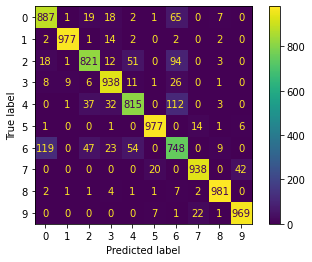

In [ ]:
cm = confusion_matrix(y_test, p_test, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()

print(cm)


In [ ]:
Labels=train_dataset.classes

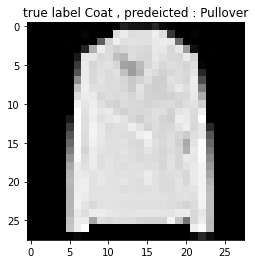

In [ ]:
x_test = X_test.cpu().numpy()
misMatch=np.where(y_test != p_test)[0]
index=np.random.choice(misMatch)
plt.imshow(x_test[index],cmap='gray')
plt.title(f'true label {Labels[y_test[index]]} , predeicted : {Labels[int(p_test[index])]}')
plt.show()

In [ ]:
## Exercise :
# ANN with Fashion MNIST?
# CNN with MNIST?